In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel(r"C:\Users\ANCHAL\Desktop\CODING\M.L\ML PROJECT\Liver diseases prediction\Dataset.xlsx")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.shape

(583, 11)

In [5]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [14]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

In [16]:
df['Gender']=df['Gender'].apply(lambda x:1 if x=='Male' else 0)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<Axes: xlabel='Gender'>

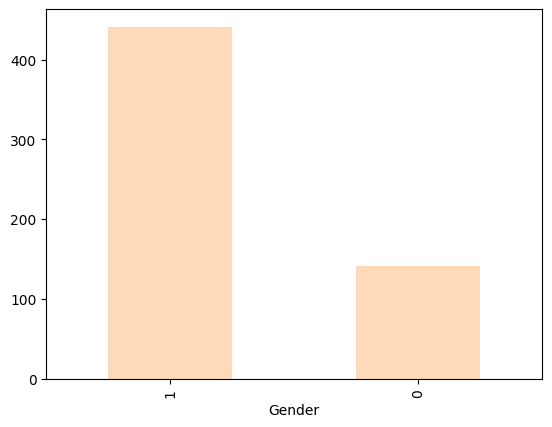

In [18]:
df['Gender'].value_counts().plot.bar(color='peachpuff')

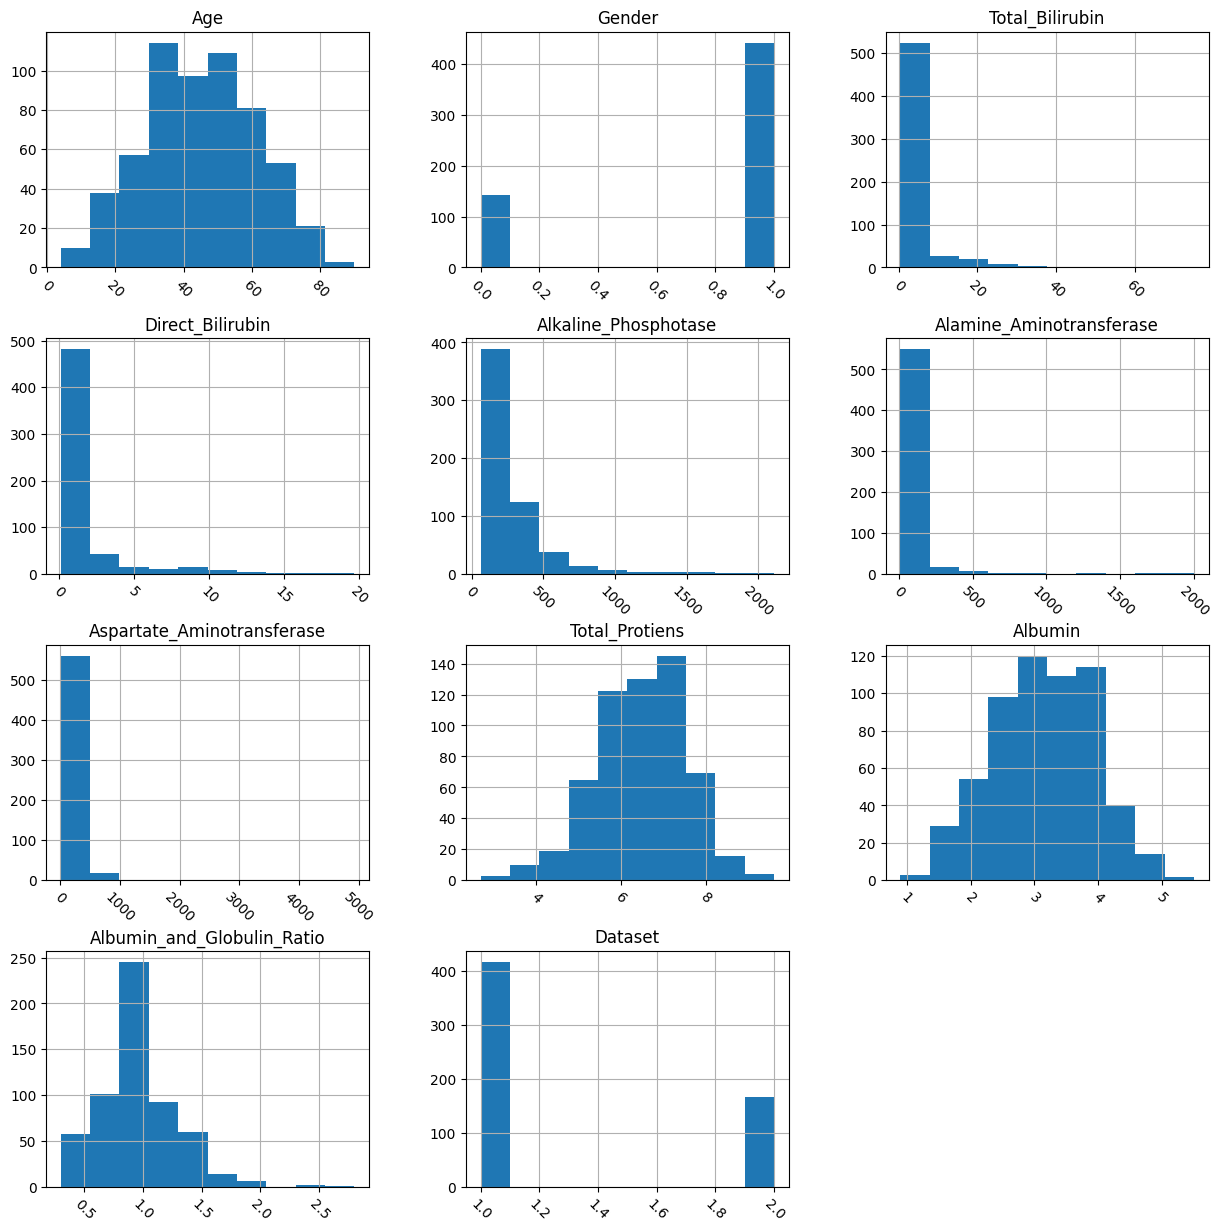

In [19]:
df.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

In [21]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [22]:
mean = df['Albumin_and_Globulin_Ratio'].mean()

In [26]:
df=df.fillna(mean)

In [28]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

<Axes: xlabel='Age'>

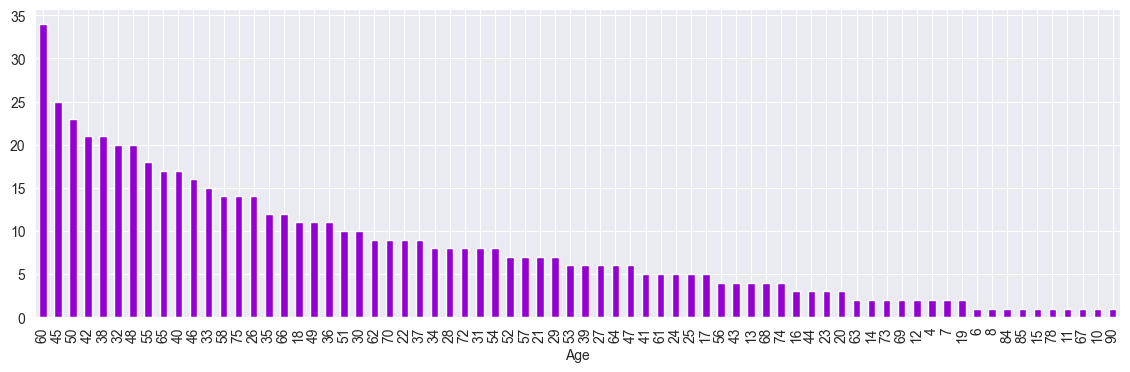

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,4))
df['Age'].value_counts().plot.bar(color='darkviolet')

In [31]:
corr = df.corr()
corr

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


<Axes: >

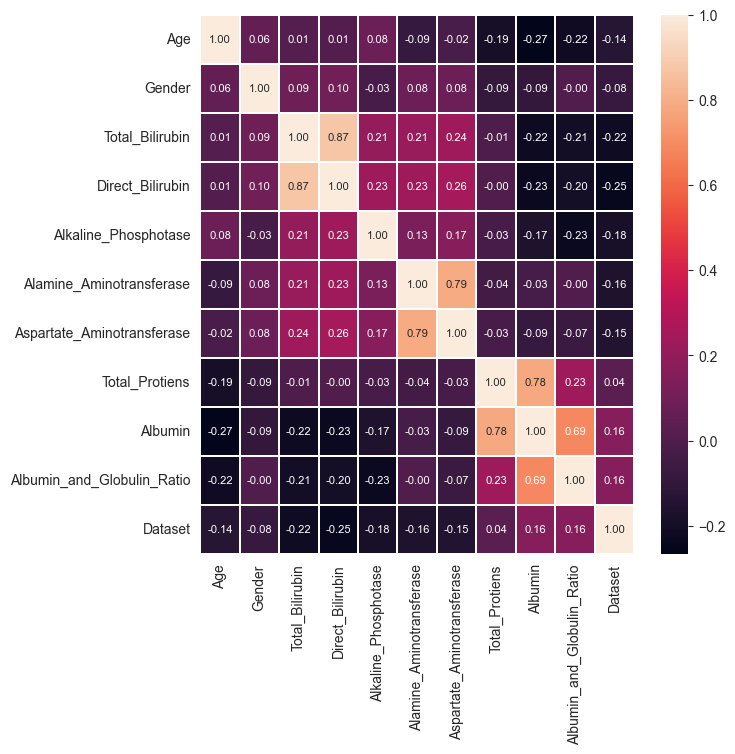

In [34]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True, fmt=".2f", annot_kws={"size": 8}, linewidths=0.3, linecolor='white')

In [35]:
df = df.drop_duplicates()

In [38]:
df.shape

(570, 11)

In [40]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [42]:
y=df.Dataset
X=df.drop('Dataset', axis=1)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.1, random_state=0, stratify=y)

In [48]:
train_mean = X_train.mean()
train_std = X_train.std()

In [50]:
X_train = (X_train - train_mean) / train_std
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02
mean,4.155221e-17,1.696715e-16,-5.540294e-17,-5.194026e-18,4.847757e-17,6.232831e-17,-2.250745e-17,3.254923e-16,-2.216118e-16,-3.384774e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.520528e+00,-1.723642e+00,-4.490132e-01,-4.935442e-01,-9.202213e-01,-3.784774e-01,-3.362002e-01,-3.554833e+00,-2.833339e+00,-2.074077e+00
25%,-7.363584e-01,-1.723642e+00,-4.026944e-01,-4.591856e-01,-4.669678e-01,-3.046327e-01,-2.865379e-01,-6.689016e-01,-7.037562e-01,-7.907880e-01
50%,1.918849e-03,5.790360e-01,-3.718151e-01,-4.248271e-01,-3.386129e-01,-2.466118e-01,-2.302539e-01,7.585482e-02,-7.740830e-02,1.848179e-03
75%,8.017192e-01,5.790360e-01,-1.247811e-01,-8.124156e-02,2.238550e-02,-1.094716e-01,-8.126684e-02,6.344221e-01,7.994788e-01,4.925013e-01
max,2.770459e+00,5.790360e-01,1.105351e+01,6.240732e+00,7.290486e+00,1.011802e+01,1.594974e+01,2.775597e+00,2.929062e+00,4.984014e+00


In [52]:
X_test = (X_test - train_mean) / train_std
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,-0.073636,0.134660,-0.133449,-0.133684,-0.026803,-0.106881,-0.071683,-0.206695,-0.160921,0.048416
std,0.999025,0.916805,0.597226,0.685023,0.832122,0.395158,0.525580,1.116991,0.978196,1.210209
min,-2.520528,-1.723642,-0.464453,-0.493544,-0.771811,-0.357379,-0.329579,-2.716982,-2.833339,-2.074077
25%,-0.736358,0.579036,-0.402694,-0.459186,-0.507079,-0.325731,-0.296470,-0.855091,-0.703756,-0.469966
50%,0.063442,0.579036,-0.371815,-0.424827,-0.314546,-0.251886,-0.256740,-0.203429,-0.327947,0.171679
75%,0.678673,0.579036,-0.201979,-0.081242,0.070519,-0.120021,-0.154105,0.448233,0.548940,0.492501
max,1.539996,0.579036,2.499955,2.736160,4.242055,1.625880,2.775974,2.868691,1.926905,5.946481


In [54]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [56]:
y_pred = lr.predict(X_test)

In [58]:
print(accuracy_score(y_train, lr.predict(X_train)))
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)
print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

0.7212475633528265
0.7543859649122807
[[39  2]
 [12  4]]
              precision    recall  f1-score   support

           1       0.76      0.95      0.85        41
           2       0.67      0.25      0.36        16

    accuracy                           0.75        57
   macro avg       0.72      0.60      0.61        57
weighted avg       0.74      0.75      0.71        57



In [60]:
from sklearn.metrics import f1_score
lr_f1 = f1_score(y_test, lr.predict(X_test))

print(f"F1 Score: {lr_f1:.2f}")

F1 Score: 0.85


In [62]:
from sklearn.metrics import precision_score
lr_precision = precision_score(y_test, lr.predict(X_test))

print(f"Precision: {lr_precision:.2f}")

Precision: 0.76


In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
knn.predict(X_test)

array([2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [68]:
print(accuracy_score(y_train, lr.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

0.7212475633528265
0.6666666666666666
[[32  9]
 [10  6]]
              precision    recall  f1-score   support

           1       0.76      0.78      0.77        41
           2       0.40      0.38      0.39        16

    accuracy                           0.67        57
   macro avg       0.58      0.58      0.58        57
weighted avg       0.66      0.67      0.66        57



In [70]:
knn_f1 = f1_score(y_test, knn.predict(X_test))

print(f"F1 Score: {knn_f1:.2f}")

F1 Score: 0.77


In [72]:
knn_precision = precision_score(y_test, knn.predict(X_test))

print(f"Precision: {knn_precision:.2f}")

Precision: 0.76


In [74]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
print(confusion_matrix(y_test, dtc.predict(X_test)))
print(classification_report(y_test, dtc.predict(X_test)))

1.0
0.6842105263157895
[[31 10]
 [ 8  8]]
              precision    recall  f1-score   support

           1       0.79      0.76      0.77        41
           2       0.44      0.50      0.47        16

    accuracy                           0.68        57
   macro avg       0.62      0.63      0.62        57
weighted avg       0.70      0.68      0.69        57



In [78]:
dtc_f1 = f1_score(y_test, dtc.predict(X_test))

print(f"F1 Score: {dtc_f1:.2f}")

F1 Score: 0.77


In [80]:
dtc_precision = precision_score(y_test, dtc.predict(X_test))

print(f"Precision: {dtc_precision:.2f}")

Precision: 0.79


In [82]:
rand_clf = RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75, min_samples_leaf=7, min_samples_split=3, n_estimators = 130)

In [84]:
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=7, min_samples_split=3,
                       n_estimators=130)

In [86]:
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(rand_clf_acc)
print(confusion_matrix(y_test, rand_clf.predict(X_test)))
print(classification_report(y_test, rand_clf.predict(X_test)))

0.9083820662768031
0.7543859649122807
[[39  2]
 [12  4]]
              precision    recall  f1-score   support

           1       0.76      0.95      0.85        41
           2       0.67      0.25      0.36        16

    accuracy                           0.75        57
   macro avg       0.72      0.60      0.61        57
weighted avg       0.74      0.75      0.71        57



In [88]:
clf_f1 = f1_score(y_test, rand_clf.predict(X_test))

print(f"F1 Score: {clf_f1:.2f}")

F1 Score: 0.85


In [90]:
clf_precision = precision_score(y_test, rand_clf.predict(X_test))

print(f"Precision: {clf_precision:.2f}")

Precision: 0.76


In [92]:
model_1 = pd.DataFrame({
    'Model_1':['Logistic Regreesion','KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score':[100*round(lr_acc, 4), 100*round(knn_acc, 4), 100*round(dtc_acc, 4), 100*round(rand_clf_acc, 4)]
})

In [94]:
model_1.sort_values(by='Score', ascending=False)

,Model_1,Score
0,Logistic Regreesion,75.44
3,Random Forest Classifier,75.44
2,Decision Tree Classifier,68.42
1,KNN,66.67


In [96]:
model_2 = pd.DataFrame({
    'Model_2':['Logistic Regreesion','KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'f1-Score':[100*round(lr_f1, 4), 100*round(knn_f1, 4), 100*round(dtc_f1, 4), 100*round(clf_f1, 4)]
})

In [98]:
model_2.sort_values(by='f1-Score', ascending=False)

,Model_2,f1-Score
0,Logistic Regreesion,84.78
3,Random Forest Classifier,84.78
2,Decision Tree Classifier,77.50
1,KNN,77.11


In [100]:
model_3 = pd.DataFrame({
    'Model_3':['Logistic Regreesion','KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'precision':[100*round(lr_precision, 4), 100*round(knn_precision, 4), 100*round(dtc_precision, 4), 100*round(clf_precision, 4)]
})

In [102]:
model_3.sort_values(by='precision', ascending=False)

,Model_3,precision
2,Decision Tree Classifier,79.49
0,Logistic Regreesion,76.47
3,Random Forest Classifier,76.47
1,KNN,76.19
